In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
file_name = "g-2_all_data.csv"
data = pd.read_csv(file_name, delimiter=',', header=None)

# 为列添加标签
data.columns = ["x0", "y0", "err0", "x1", "y1", "err1", "x2", "y2",
                "err2", "x3", "y3", "err3", "x4", "y4", "err4", "x5", "y5", "err5"]

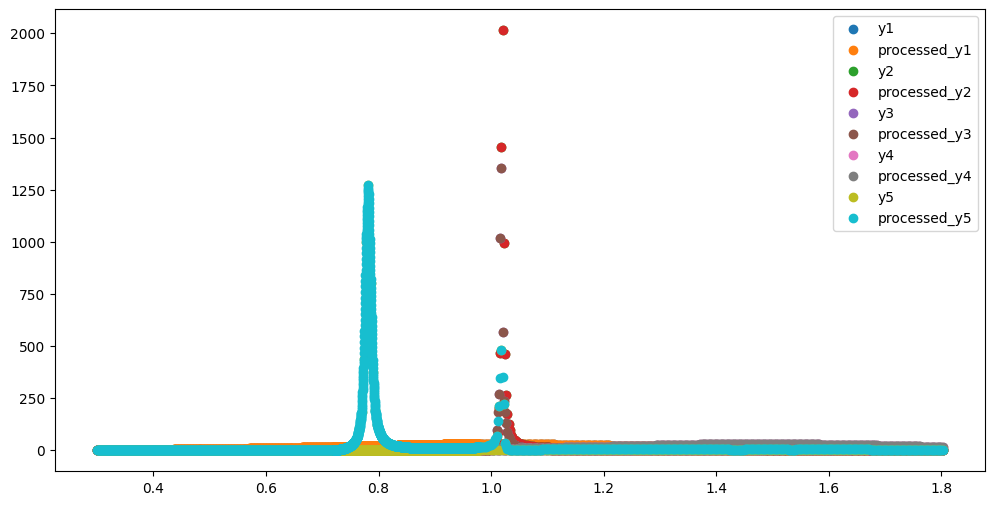

In [2]:

# 插值y*和err*列
for i in range(6):
    col_name = f"y{i}"
    err_col_name = f"err{i}"
    processed_col_name = f"processed_y{i}"
    processed_err_col_name = f"processed_err{i}"
    data[col_name] = np.where(data[col_name] == 0, np.nan, data[col_name])
    data[err_col_name] = np.where(
        data[err_col_name] == 0, np.nan, data[err_col_name])
    data[processed_col_name] = data[col_name].interpolate()
    data[processed_err_col_name] = data[err_col_name].interpolate()

# give final data
data = data.fillna(0)

# 添加 processed_y 列，为所有 processed_y* 列的总和
data['processed_y'] = data.filter(like='processed_y').sum(axis=1)

# 添加 processed_err 列，为所有 processed_err* 列的平方和的平方根
data['processed_err'] = np.sqrt(data.filter(
    like='processed_err').pow(2).sum(axis=1))


# 创建散点图
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    col_name = f"y{i}"
    processed_col_name = f"processed_y{i}"
    plt.scatter(data["x0"], data[col_name], label=col_name)
    plt.scatter(data["x0"], data[processed_col_name], label=processed_col_name)

# 添加图例
plt.legend()

# 保存散点图
# plt.savefig("scatter_plot.png")

# 显示图形
plt.show()

# 保存处理后的数据
data.to_csv("processed_"+file_name, index=False)

In [3]:
data

,x0,y0,err0,x1,y1,err1,x2,y2,err2,x3,...,processed_y2,processed_err2,processed_y3,processed_err3,processed_y4,processed_err4,processed_y5,processed_err5,processed_y,processed_err
0,0.300000,18.415000,5.368521,0.300000,0.00000,0.00000,0.300000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.415000,5.368521
1,0.300879,20.204507,7.158027,0.300879,0.00000,0.00000,0.300879,0.000000,0.000000,0.300879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.204507,7.158027
2,0.301757,21.994014,5.368521,0.301757,0.00000,0.00000,0.301757,0.000000,0.000000,0.301757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.994014,5.368521
3,0.302636,21.994014,5.368521,0.302636,1.15192,0.14768,0.302636,0.000000,0.000000,0.302636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.145934,5.370551
4,0.303515,21.994014,5.368521,0.303515,0.00000,0.00000,0.303515,0.000000,0.000000,0.303515,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.170547,5.370551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,1.793445,1.450324,0.244581,1.793445,0.00000,0.00000,1.793445,0.170580,0.021372,1.793445,...,0.170580,0.021372,0.048679,0.047762,15.528716,0.788635,1.308334,0.358115,24.556608,0.993896
1819,1.795574,1.450324,0.244581,1.795574,6.02536,0.44304,1.795574,0.167513,0.024440,1.795574,...,0.167513,0.024440,0.048679,0.047762,15.416054,0.751081,1.293961,0.343741,24.401892,0.970187
1820,1.797704,1.450324,0.244581,1.797704,0.00000,0.00000,1.797704,0.163567,0.020494,1.797704,...,0.163567,0.020494,0.046350,0.045432,15.265838,0.751081,1.279588,0.329368,24.157186,0.964984
1821,1.799833,1.450324,0.244581,1.799833,5.87768,0.44304,1.799833,0.167513,0.024440,1.799833,...,0.167513,0.024440,0.046350,0.045432,15.190730,0.751081,1.225035,0.274815,23.957632,0.947846


<ErrorbarContainer object of 3 artists>

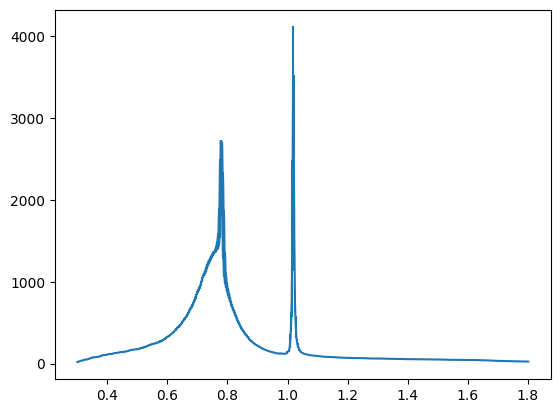

In [4]:
plt.errorbar(x=data["x0"], y=data["processed_y"], yerr=data["processed_err"])